# Find Phone Visualization

### Main Resource: https://www.pyimagesearch.com/2016/02/01/opencv-center-of-contour/

In [1]:
#import necessary libraries
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imutils

Populating the interactive namespace from numpy and matplotlib


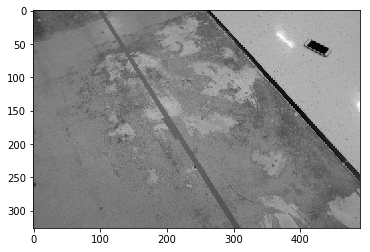

In [2]:
#load image and convert to grayscale
image = cv2.imread('data/1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray")
plt.show()

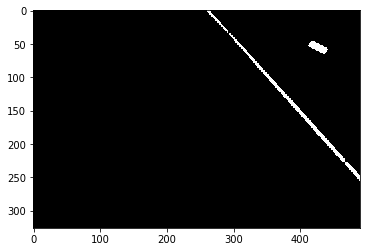

In [3]:
#convert image to binary and invert (for contours)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, cmap = "gray")
plt.show()

In [4]:
#calculate contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [5]:
#contour "algorithm" to detect phone
N = len(cnts)
cnts_values = np.ones(N)*np.maximum(image.shape[0],image.shape[1])
for i in range(N):
    param = cv2.arcLength(cnts[i],True)/4
    area = sqrt(cv2.contourArea(cnts[i]))
    if (param>10) and (area>10):
        cnts_values[i] = np.absolute(param-area)/np.minimum(param,area)
phone = np.argmin(cnts_values)

In [6]:
#calculate center
M = cv2.moments(cnts[phone])
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print("Center: " + str(cX/image.shape[1]) + " , " + str(cY/image.shape[0]))

Center: 0.8693877551020408 , 0.1687116564417178


In [7]:
#draw contour and center on image
cv2.drawContours(image, [cnts[phone]], -1, (0, 255, 0), 2)
cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
cv2.putText(image, "center", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
#show and save image
cv2.imwrite('detect.jpg',image)
cv2.imshow("Image", image)
cv2.waitKey(0)

-1

In [8]:
#code to iterate over all images and save detection images
from pathlib import Path
import os

directory = './detect'
if not os.path.exists(directory):
    os.makedirs(directory)

pathlist = Path('data').glob('**/*.jpg')
for path in pathlist:
    print('detect' + str(path)[len('data'):])

detect\0.jpg
detect\1.jpg
detect\10.jpg
detect\100.jpg
detect\101.jpg
detect\102.jpg
detect\103.jpg
detect\104.jpg
detect\105.jpg
detect\106.jpg
detect\107.jpg
detect\108.jpg
detect\109.jpg
detect\11.jpg
detect\110.jpg
detect\111.jpg
detect\112.jpg
detect\113.jpg
detect\114.jpg
detect\115.jpg
detect\116.jpg
detect\117.jpg
detect\118.jpg
detect\119.jpg
detect\12.jpg
detect\120.jpg
detect\121.jpg
detect\122.jpg
detect\123.jpg
detect\124.jpg
detect\125.jpg
detect\126.jpg
detect\127.jpg
detect\128.jpg
detect\129.jpg
detect\13.jpg
detect\130.jpg
detect\131.jpg
detect\132.jpg
detect\133.jpg
detect\134.jpg
detect\14.jpg
detect\15.jpg
detect\16.jpg
detect\17.jpg
detect\18.jpg
detect\20.jpg
detect\22.jpg
detect\23.jpg
detect\24.jpg
detect\25.jpg
detect\26.jpg
detect\27.jpg
detect\29.jpg
detect\3.jpg
detect\30.jpg
detect\31.jpg
detect\32.jpg
detect\33.jpg
detect\34.jpg
detect\35.jpg
detect\36.jpg
detect\37.jpg
detect\38.jpg
detect\39.jpg
detect\4.jpg
detect\40.jpg
detect\41.jpg
detect\42.jpg
det